# MNIST

In [82]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [83]:
import numpy as np
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1 ,cache=True)
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)
except ImportError:
    from sklearn.datesets import fetch_mldata
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [84]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [85]:
y.shape

(70000,)

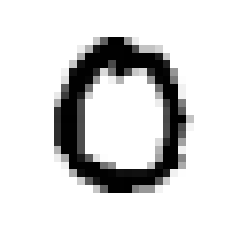

In [86]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[3600]
some_digit_image = some_digit.reshape(28 ,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [87]:
y[3600]

0

In [88]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [89]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary classifier

In [90]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [91]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
sgd_clf.predict([some_digit])

array([False])

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96345, 0.9671 , 0.9674 ])

In [94]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [95]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# Accuracy is generally not the preferred performance measure for classifier,
# especially when you are dealing with skewed datasets.

array([0.9057 , 0.91175, 0.9115 ])

In [96]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53833,   746],
       [ 1295,  4126]])

In [98]:
y_train_perfect_predixtions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predixtions)

array([[54579,     0],
       [    0,  5421]])

In [99]:
len(y_train_pred)

60000

## Precison and Recall

In [100]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.84688013136289

In [101]:
3758/(3758 + 1188)

0.7598059037606146

In [102]:
recall_score(y_train_5, y_train_pred)

0.7611141855746172

In [103]:
3758/(3758 + 1663)

0.6932300313595278

In [104]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8017098999319927

In [105]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [106]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

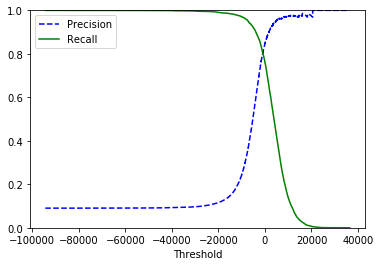

In [107]:
def plot_precision_recall_vs_threshold(pressions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [108]:
y_train_pred_90 = (y_scores > 7000)

In [109]:
precision_score(y_train_5, y_train_pred_90)

0.9609325771896661

In [110]:
recall_score(y_train_5, y_train_pred_90)

0.2813134108098137

## The ROC Curve

In [111]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

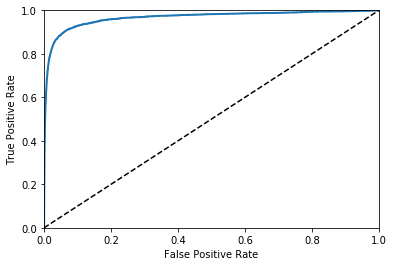

In [112]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [113]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9664504429757251

In [138]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [139]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_fprest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

/Users/zhangming/Documents/codes/ENV-ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


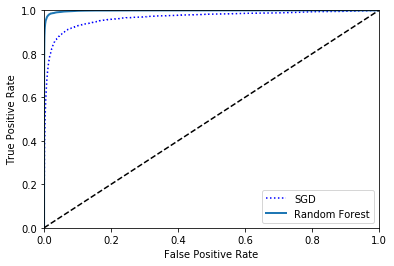

In [140]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_fprest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [141]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984124003115813

## Multiclass Classification

In [142]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([0], dtype=int8)

In [143]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ 26294.70941461, -30214.69688514,  -3410.77650726,
        -12375.75350637, -26389.06440771,  -7651.06567745,
        -19799.60404584, -17741.23586017,  -6803.57064648,
        -11435.20443042]])

In [144]:
np.argmax(some_digit_scores)

0

In [145]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [146]:
sgd_clf.classes_[5]

5

In [147]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([0], dtype=int8)

In [148]:
len(ovo_clf.estimators_)

45

In [149]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([0], dtype=int8)

In [150]:
forest_clf.predict_proba([some_digit])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [151]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8618 , 0.8229 , 0.85965])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

## Error Analysis